# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_results = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview
complete_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mice_count = len(complete_results['Mouse ID'].unique())
mice_count

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
double_mouse = complete_results[complete_results.duplicated(['Mouse ID','Timepoint'])]
print (double_mouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
double_mouse = complete_results.loc[complete_results['Mouse ID']=='g989']
double_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = complete_results[complete_results['Mouse ID'].isin(double_mouse)== False]

In [11]:
# Checking the number of mice in the clean DataFrame.
print(f'Number of Mouse after the cleaning:',len(clean_mouse_data.groupby('Mouse ID').count()))
clean_mouse_data

Number of Mouse after the cleaning: 249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_vol_mean = clean_mouse_data.groupby(['Drug Regimen']).mean()

tumor_vol_median = clean_mouse_data.groupby(['Drug Regimen']).median()

tumor_vol_variance = clean_mouse_data.groupby(['Drug Regimen']).var()

tumor_vol_std = clean_mouse_data.groupby(['Drug Regimen']).std()

tumor_vol_sem = clean_mouse_data.groupby(['Drug Regimen']).sem()

results_df = pd.DataFrame({
                            'Mean Tumor Volume':tumor_vol_mean,
                           'Median Tumor Volume':tumor_vol_median,
                           'Tumor Volume Variance':tumor_vol_variance,
                           'Tumor Volume Std. Dev':tumor_vol_std,
                           'Tumor Volume Std. Err':tumor_vol_sem
                           })

results_df = results_df['Drug Regimen']
results_df

C:\Users\Santiago Ayala\AppData\Local\Temp\ipykernel_45408\3496954162.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_vol_mean = clean_mouse_data.groupby(['Drug Regimen']).mean()
C:\Users\Santiago Ayala\AppData\Local\Temp\ipykernel_45408\3496954162.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_vol_median = clean_mouse_data.groupby(['Drug Regimen']).median()
C:\Users\Santiago Ayala\AppData\Local\Temp\ipykernel_45408\3496954162.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either s

ValueError: If using all scalar values, you must pass an index

In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mice Timepoints'>

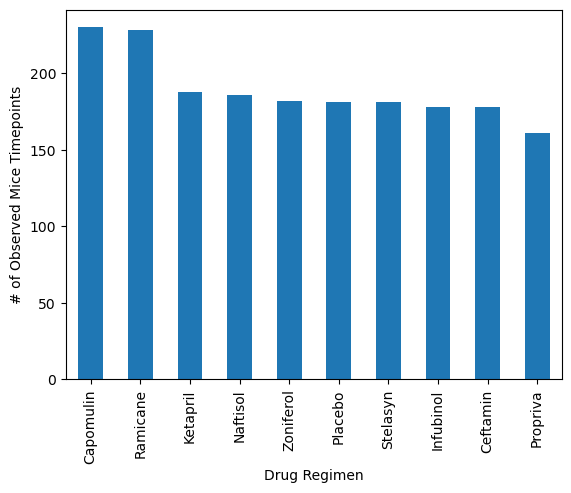

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = clean_mouse_data['Drug Regimen'].value_counts().sort_values(ascending=False)
regimen_count.plot(kind='bar',xlabel='Drug Regimen',ylabel='# of Observed Mice Timepoints')

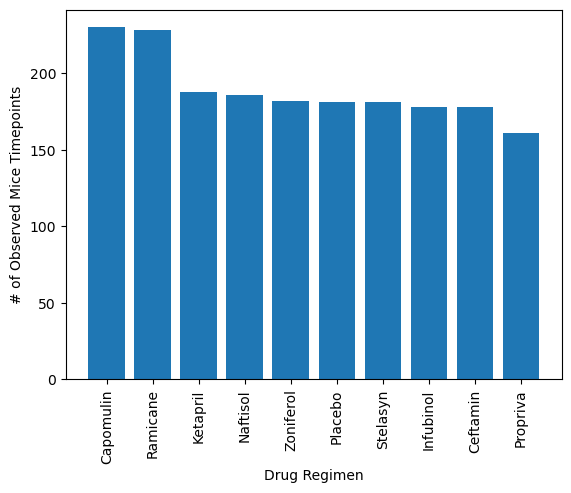

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pypl
regimen_count = clean_mouse_data['Drug Regimen'].value_counts().sort_values(ascending=False)
regimens = regimen_count.index.to_list()
plt.bar(regimens,regimen_count)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mice Timepoints')
plt.show()

Text(0, 0.5, 'Sex')

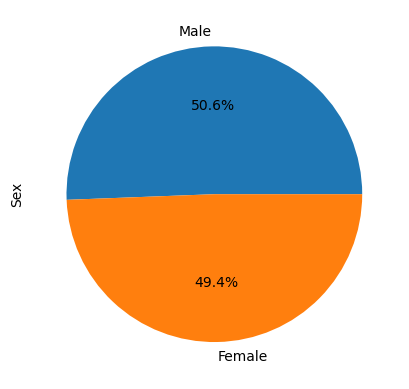

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mouse_data['Sex'].value_counts().sort_values(ascending=False)
sex_count.plot(kind='pie',autopct='%.1f%%').set_ylabel('Sex')

Text(0, 0.5, 'Sex')

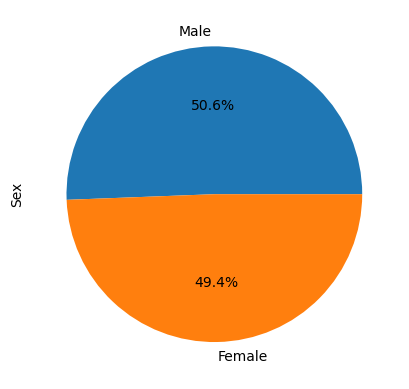

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_mouse_data['Sex'].value_counts().sort_values(ascending=False)
sex_count
plt.pie(sex_count,labels=sex_count.index.to_list(),autopct='%.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_mouse = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = greatest_timepoint_mouse.merge(clean_mouse_data,on=['Mouse ID','Timepoint'],how='left')
print(max_timepoint_df.head())

treatment_names = ['Capomulin','Ramicane','Infubinol','Cerftamin']

for name in range(len(treatment_names)):
    temp = max_timepoint_df[max_timepoint_df['Drug Regimen']== treatment_names[name]]

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = {}

for drug in ['Capomulin','Ramicane','Ceftamin']:
    tumor_volume_data[drug]=max_timepoint_df.loc[max_timepoint_df['Drug Regimen']==drug,'Tumor Volume (mm3)']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volume_data[drug].quantile([0.25,0.5,0.75])

lowq = quartiles[0.25]
uppq = quartiles[0.75]
mean = tumor_volume_data[drug].mean()
iqr = uppq-lowq
lowbound = lowq-(1.5*iqr)
uppbound = uppq+(1.5*iqr)
outlier = tumor_volume_data[drug].loc[(lowbound>tumor_volume_data[drug]) | (tumor_volume_data[drug]>uppbound)].to_list()

print(f'''{drug}:
      outliers:{outlier}''')




    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Ceftamin:
      outliers:[]


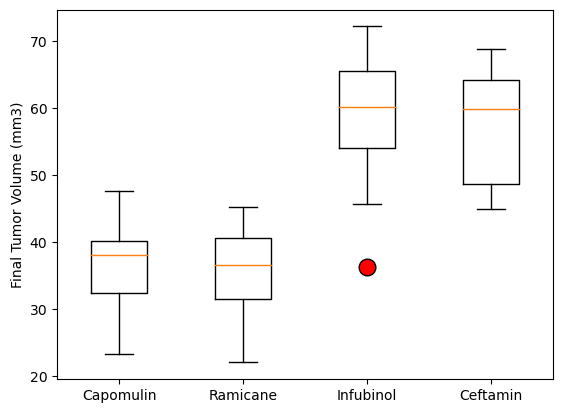

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

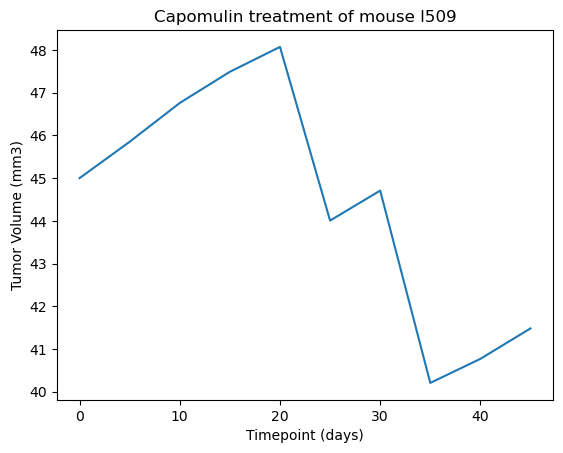

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


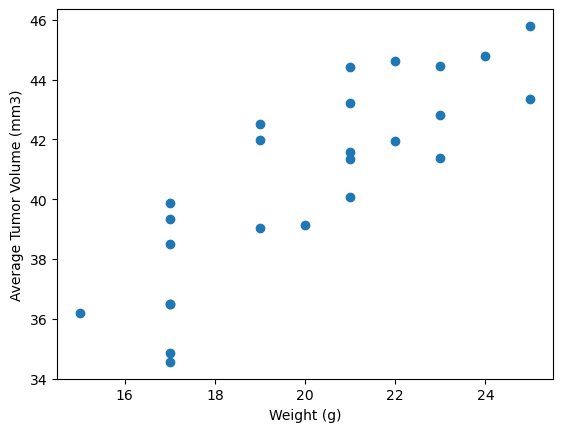

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


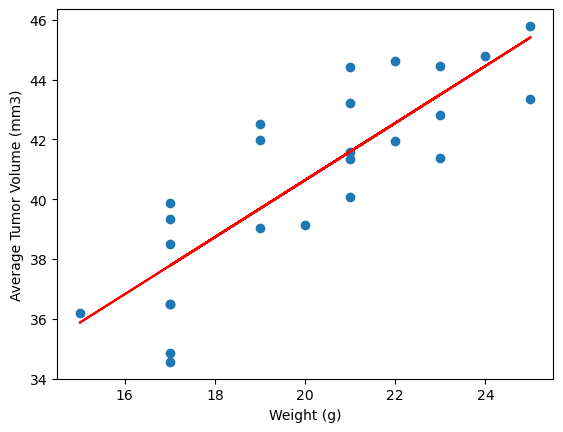

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
